In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-07-17 11:50:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-07-17 11:50:50 (162 MB/s) - ‘loan_train.csv’ saved [23101/23101]



# ***Loading Data***

In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# ***Converting to date time object***

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# ***Data visualisation and preprocessing***

In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df['loan_status'] = le.fit_transform(df['loan_status'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,1
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,1
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,0
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,1


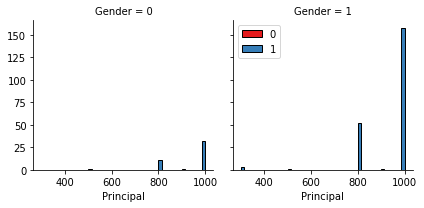

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max())
g = sns.FacetGrid(df, col='Gender' ,hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

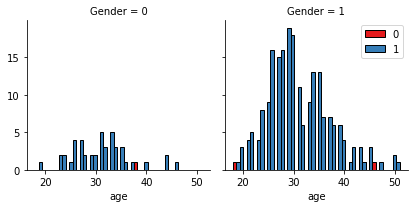

In [ ]:
bins = np.linspace(df.age.min(), df.age.max())
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

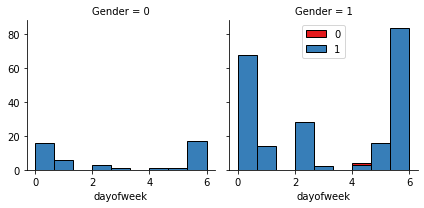

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x<3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,0,4,0
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,1,4,0


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       1              0.865385
        0              0.134615
1       1              0.731293
        0              0.268707
Name: loan_status, dtype: float64

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

# ***Feature selection***

In [ ]:
Feature = df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,0,0,0,1
4,1000,30,29,1,0,0,0,1


In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,0,0,0,1
4,1000,30,29,1,0,0,0,1


In [ ]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -0.81453148,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -0.81453148,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -0.81453148,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177, -0.81453148,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004, -0.81453148,
        -0.38170062, -0.87997669,  1.14984679]])

# **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# KNN

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

**Hyperparameter tuning for KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {'n_neighbors' : [4,7,5,10,22,2],
               'weights' : ['uniform', 'distance'],
               'metric' : ['euclidean', 'minkowski']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3)

In [ ]:
res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
res.best_score_

0.7246376811594203

In [ ]:
res.best_params_ #best k = n_neighbors = 7

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [ ]:
loanTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [ ]:
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [ ]:
y_hat = loanTree.predict(X_test)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.7428571428571429


**Hyperparameter tuning for Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hParams = {'max_depth' : [4,2,9,30,11],
           'min_samples_leaf' : [10,20,30,40,50]}

In [ ]:
hTune = GridSearchCV(DecisionTreeClassifier(), hParams, verbose=1, cv=4)

In [ ]:
hTune.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 2, 9, 30, 11],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             verbose=1)

In [ ]:
hTune.best_score_

0.7318840579710144

In [ ]:
hTune.best_params_

{'max_depth': 4, 'min_samples_leaf': 20}

# SVM

In [ ]:
from sklearn import svm

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [ ]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

**Hyperparameter tuning for SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svmParam = {'kernel' :  ['rbf', 'sigmoid', 'poly'],
           'decision_function_shape' : ['ovo', 'ovr']}

In [ ]:
sV = GridSearchCV(SVC(), svmParam, verbose=1, cv=3)
res1 = sV.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
res1.best_params_

{'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

In [ ]:
res1.best_score_

0.7427536231884059

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [ ]:
lR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
ly_hat = lR.predict(X_test)
ly_hat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [ ]:
yhat_prob = lR.predict_proba(X_test)
yhat_prob

array([[0.50122287, 0.49877713],
       [0.45013911, 0.54986089],
       [0.30748522, 0.69251478],
       [0.34246758, 0.65753242],
       [0.31948714, 0.68051286],
       [0.31639745, 0.68360255],
       [0.48565491, 0.51434509],
       [0.47528986, 0.52471014],
       [0.34246758, 0.65753242],
       [0.49164976, 0.50835024],
       [0.33780761, 0.66219239],
       [0.49432417, 0.50567583],
       [0.25008438, 0.74991562],
       [0.34166907, 0.65833093],
       [0.43405151, 0.56594849],
       [0.25809965, 0.74190035],
       [0.52197123, 0.47802877],
       [0.30383179, 0.69616821],
       [0.49951456, 0.50048544],
       [0.31871624, 0.68128376],
       [0.44069738, 0.55930262],
       [0.49172937, 0.50827063],
       [0.51160205, 0.48839795],
       [0.4707073 , 0.5292927 ],
       [0.40788995, 0.59211005],
       [0.50641315, 0.49358685],
       [0.50900784, 0.49099216],
       [0.37212827, 0.62787173],
       [0.50210986, 0.49789014],
       [0.25232129, 0.74767871],
       [0.

**Hyperparameter Tuning for Logistic Regression**

In [ ]:
LRparams = {'C': [0.01, 0.03, 0.1, 0.002],
            'class_weight': ['none', 'dict', 'balanced'],
            'max_iter': [100, 250, 157]}

In [ ]:
hlR = GridSearchCV(LogisticRegression(), LRparams, verbose =1, cv=3)

In [ ]:
res2=hlR.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
res2.best_score_

0.7427536231884058

In [ ]:
res2.best_params_

{'C': 0.01, 'class_weight': 'none', 'max_iter': 100}

# ***Evaluation using the test set (loan_test.csv)***

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-07-17 11:50:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-07-17 11:50:54 (669 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [ ]:
df_t = pd.read_csv('loan_test.csv')
df_t.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
df_t['due_date'] = pd.to_datetime(df_t['due_date'])
df_t['effective_date'] = pd.to_datetime(df_t['effective_date'])
df_t.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [ ]:
df_t['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_t["Gender"]=le.fit_transform(df_t["Gender"])
df_t['loan_status'] = le.fit_transform(df_t['loan_status'])
df_t.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,0
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,1


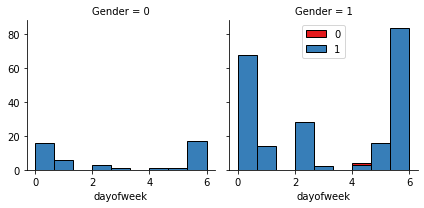

In [ ]:
df_t['dayofweek'] = df_t['effective_date'].dt.dayofweek
bins = np.linspace(df_t.dayofweek.min(), df_t.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df_t['weekend'] = df_t['dayofweek'].apply(lambda x: 1 if (x<3) else 0)
df_t.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,0,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,1,4,0
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,0,5,0
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,1,5,0
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,1,6,0


In [ ]:
df_t.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       1              0.727273
        0              0.272727
1       1              0.744186
        0              0.255814
Name: loan_status, dtype: float64

In [ ]:
df_t.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              1.000000
High School or Below  1              0.523810
                      0              0.476190
Master or Above       1              1.000000
college               1              0.826087
                      0              0.173913
Name: loan_status, dtype: float64

In [ ]:
X_eval = df_t[['Principal','terms','age','Gender','weekend']]
X_eval = pd.concat([X_eval,pd.get_dummies(df_t['education'])], axis=1)
X_eval.drop(['Master or Above'], axis = 1,inplace=True)
X_eval.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,0,0,1,0,0
1,300,7,35,1,0,0,0,0
2,1000,30,43,0,0,0,1,0
3,1000,30,26,1,0,0,0,1
4,800,15,29,1,0,1,0,0


In [ ]:
X_eval = preprocessing.StandardScaler().fit(X_eval).transform(X_eval)
y_eval = df_t['loan_status'].values
y_eval

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

KNN

In [ ]:
y_knn = gs.predict(X_eval)
y_knn

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
f1_score(y_eval, y_knn, pos_label=1)

0.7999999999999998

In [ ]:
jaccard_score(y_eval, y_knn, pos_label=1)

0.6666666666666666

Decision Trees

In [ ]:
y_dec = hTune.predict(X_eval)
y_dec

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
f1_score(y_eval, y_dec, pos_label=1)

0.8333333333333334

In [ ]:
jaccard_score(y_eval, y_dec, pos_label=1)

0.7142857142857143

SVM

In [ ]:
y_svm = sV.predict(X_eval)
y_svm

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
f1_score(y_eval, y_svm, pos_label =1)

0.8089887640449438

In [ ]:
jaccard_score(y_eval, y_svm, pos_label =1)

0.6792452830188679

Logistic Regression

In [ ]:
y_lR = hlR.predict(X_eval)
y_lR_prob = hlR.predict_proba(X_eval)
y_lR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_lR_prob

array([[0.24379648, 0.75620352],
       [0.26198612, 0.73801388],
       [0.26627824, 0.73372176],
       [0.34039015, 0.65960985],
       [0.30568157, 0.69431843],
       [0.29908725, 0.70091275],
       [0.31925512, 0.68074488],
       [0.33025903, 0.66974097],
       [0.26337445, 0.73662555],
       [0.28570338, 0.71429662],
       [0.32596715, 0.67403285],
       [0.25714971, 0.74285029],
       [0.33297244, 0.66702756],
       [0.26877935, 0.73122065],
       [0.28087296, 0.71912704],
       [0.32142067, 0.67857933],
       [0.27056144, 0.72943856],
       [0.25052558, 0.74947442],
       [0.3271745 , 0.6728255 ],
       [0.30538481, 0.69461519],
       [0.32948298, 0.67051702],
       [0.31060312, 0.68939688],
       [0.13875066, 0.86124934],
       [0.1702357 , 0.8297643 ],
       [0.17957395, 0.82042605],
       [0.18519121, 0.81480879],
       [0.17164529, 0.82835471],
       [0.15816463, 0.84183537],
       [0.18470258, 0.81529742],
       [0.18788184, 0.81211816],
       [0.

In [ ]:
f1_score(y_eval, y_lR, pos_label=1)

0.851063829787234

In [ ]:
jaccard_score(y_eval, y_lR, pos_label=1)

0.7407407407407407

In [ ]:
log_loss(y_eval, y_lR_prob)

0.519156250942168